In [29]:
from models import ml_racer_pred_dl
from models.preprocessing_racer_pred_dl import RacerPredDlPreprocessor
from raceresults import RaceResults
from tensorflow import keras
import pandas as pd

In [12]:
result_mana = RaceResults()
raw_data = result_mana.get_results_pd()
preprosecessor = RacerPredDlPreprocessor()

In [13]:
preprosecessor.data_prepare(raw_data, True)

In [19]:
_X, _y = preprosecessor.get_prepared_data()

In [20]:
X = _X.values
y = _y.values

In [23]:
model = ml_racer_pred_dl.build_model(_X)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                15210     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 15,551
Trainable params: 15,551
Non-trainable params: 0
_________________________________________________________________


In [27]:
EPOCHS = 100

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, ml_racer_pred_dl.PrintDot()])


.................

In [21]:
import matplotlib.pyplot as plt
import pathlib

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

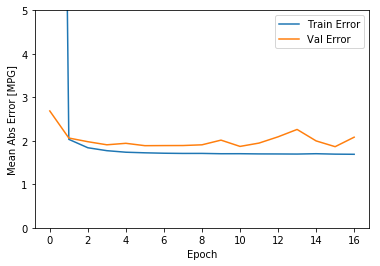

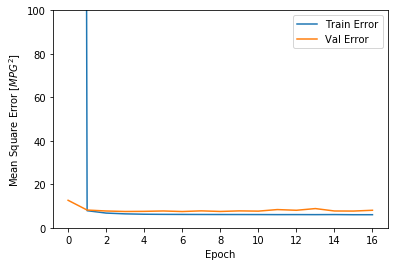

In [30]:
plot_history(history)

In [33]:
predict_data = [(107.5, '4189', '江戸川', 1800, 1, 6.44, '2020-02-02')\
                , (107.5, '4357', '江戸川', 1800, 2, 6.51, '2020-02-02')\
                , (107.5, '4993', '江戸川', 1800, 3, 6.60, '2020-02-02')\
                , (107.5, '3548', '江戸川', 1800, 4, 6.63, '2020-02-02')\
                , (107.5, '4558', '江戸川', 1800, 5, 6.62, '2020-02-02')\
                , (107.5, '4411', '江戸川', 1800, 6, 6.60, '2020-02-02')]
predict_data_pd = pd.DataFrame(predict_data, columns=raceresults.COLUMN_LIST)

preprosecessor.data_prepare(predict_data_pd, False)
_test_X, _test_y = preprosecessor.get_prepared_data()

b = model.predict(_test_X.values)

In [34]:
b

array([[113.842285],
       [113.77693 ],
       [116.71713 ],
       [114.87875 ],
       [115.454094],
       [115.22334 ]], dtype=float32)